<a href="https://colab.research.google.com/github/Deekshudee/Deekshudee/blob/main/Oorsandhai_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Importing** **Data**

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default


creds, _ = default()
gc = gspread.authorize(creds)


sheet_url = 'https://docs.google.com/spreadsheets/d/14QjHj7uhfonS39D4ig67NvSg3zs9PrgH2kIY327MhJM/edit#gid=0'

try:

    sh = gc.open_by_url(sheet_url)


    worksheet = sh.get_worksheet(0)


    rows = worksheet.get_all_values()


    import pandas as pd
    df = pd.DataFrame(rows[1:], columns=rows[0])


    print(df.head())

except gspread.exceptions.SpreadsheetNotFound:
    print(f"Spreadsheet not found. Please check the URL or permissions.")
except gspread.exceptions.APIError as e:
    print(f"API Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


        Order Date Order ID  Order Status Customer ID Customer Name     City  \
0  4/4/23 11:49 AM    11153  wc-completed          93      Amritraj  Chennai   
1  4/4/23 04:50 PM    11154  wc-completed          22        Sowmya  Chennai   
2  4/4/23 04:50 PM    11154  wc-completed          22        Sowmya  Chennai   
3  4/4/23 04:50 PM    11154  wc-completed          22        Sowmya  Chennai   
4  4/4/23 04:50 PM    11154  wc-completed          22        Sowmya  Chennai   

  State Product ID                                Product Name(E & T)  \
0    TN      10990  Sprouted Health Mix | முளைக்கட்டிய சத்துமாவு (...   
1    TN       7895  Jaggery from Cauvery Delta | காவிரி டெல்டா நாட...   
2    TN      10734  White Rice Idiyappam Maavu | வெள்ளை அரிசி இடிய...   
3    TN      10771  Barnyard Millet Boiled Rice | குதிரைவாலி புழுங...   
4    TN      10774  Kambu Pearl Millet Laddu | கம்பு லட்டு (6 Piec...   

                   Product Name                Product and quantity  \
0        

In [ ]:
print(df)

            Order Date Order ID       Order Status Customer ID  \
0      4/4/23 11:49 AM    11153       wc-completed          93   
1      4/4/23 04:50 PM    11154       wc-completed          22   
2      4/4/23 04:50 PM    11154       wc-completed          22   
3      4/4/23 04:50 PM    11154       wc-completed          22   
4      4/4/23 04:50 PM    11154       wc-completed          22   
...                ...      ...                ...         ...   
3233  5/29/24 10:42 AM    14515  wc-custom-shipped         373   
3234  5/29/24 10:42 AM    14515  wc-custom-shipped         373   
3235  5/29/24 10:46 AM    14516       wc-completed         740   
3236  5/29/24 10:46 AM    14516       wc-completed         740   
3237  5/31/24 09:01 PM    14523  wc-custom-shipped          86   

              Customer Name       City State Product ID  \
0                  Amritraj    Chennai    TN      10990   
1                    Sowmya    Chennai    TN       7895   
2                    Sowmya   

In [ ]:
print(df.head())

        Order Date Order ID  Order Status Customer ID Customer Name     City  \
0  4/4/23 11:49 AM    11153  wc-completed          93      Amritraj  Chennai   
1  4/4/23 04:50 PM    11154  wc-completed          22        Sowmya  Chennai   
2  4/4/23 04:50 PM    11154  wc-completed          22        Sowmya  Chennai   
3  4/4/23 04:50 PM    11154  wc-completed          22        Sowmya  Chennai   
4  4/4/23 04:50 PM    11154  wc-completed          22        Sowmya  Chennai   

  State Product ID                                Product Name(E & T)  \
0    TN      10990  Sprouted Health Mix | முளைக்கட்டிய சத்துமாவு (...   
1    TN       7895  Jaggery from Cauvery Delta | காவிரி டெல்டா நாட...   
2    TN      10734  White Rice Idiyappam Maavu | வெள்ளை அரிசி இடிய...   
3    TN      10771  Barnyard Millet Boiled Rice | குதிரைவாலி புழுங...   
4    TN      10774  Kambu Pearl Millet Laddu | கம்பு லட்டு (6 Piec...   

                   Product Name                Product and quantity  \
0        

In [ ]:

df['Total Product Sale Price (incl. tax)'] = pd.to_numeric(df['Total Product Sale Price (incl. tax)'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')


**1.Which are the top selling products in terms of quantity(overall) ?**





In [ ]:
top_products_by_quantity = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)
print("Top Selling Products by Quantity:")
print(top_products_by_quantity)


Top Selling Products by Quantity:
Product Name
Sprouted Health Mix                          305
Karuppu Kavuni Idiyappam Maavu               216
Sprouted & Stone-ground Kambu Dosa Flour     165
Red Rice Idiyappam Maavu                     148
Black Ulundhu Kali Maavu                     142
                                            ... 
Sprouted & Stone-ground Sorghum Flour          1
Dharani Jaggery                                1
Dry Fruits Laddu                               1
Everyday Traditional Masala Combo              1
Kalyaana Ghee Murukku                          1
Name: Quantity, Length: 103, dtype: int64


Top 10 selling products in terms of quantity.

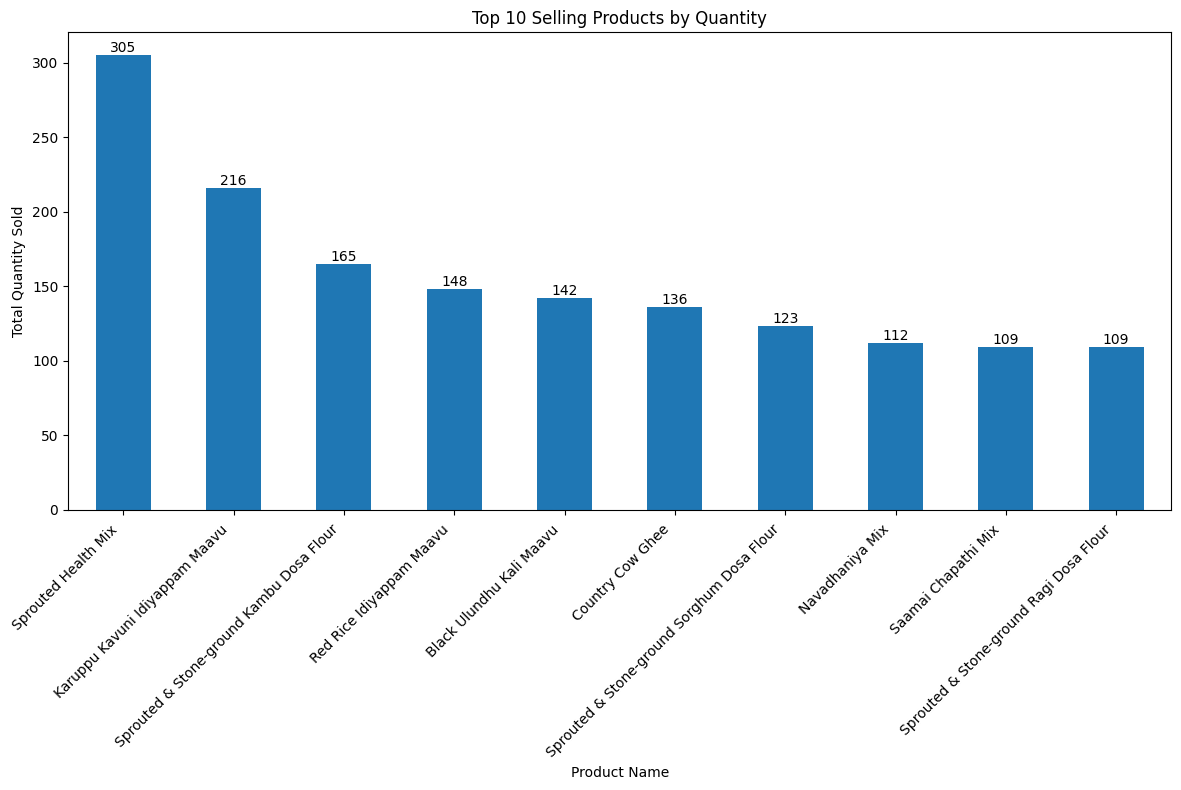

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


import pandas as pd
import matplotlib.pyplot as plt

top_products_by_quantity = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)

top_10_products = top_products_by_quantity.head(10)


plt.figure(figsize=(12, 8))
top_10_products.plot(kind='bar')


plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')


plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top_10_products):
    plt.text(index, value, str(value), ha='center', va='bottom')



plt.tight_layout()
plt.show()


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

current_date = pd.to_datetime('2024-06-15')

three_months_ago = current_date - pd.DateOffset(months=3)
six_months_ago = current_date - pd.DateOffset(months=6)
nine_months_ago = current_date - pd.DateOffset(months=9)

# Filter the data
df_last_three_months = df[df['Order Date'] >= three_months_ago]
df_last_six_months = df[df['Order Date'] >= six_months_ago]
df_last_nine_months = df[df['Order Date'] >= nine_months_ago]




<ipython-input-5-eb3503c600ea>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


a.By three months



In [ ]:
top_products_by_quantity_three_months = df_last_three_months.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)

pd.set_option('display.max_rows', None)
print("Top Selling Products by Quantity in the Last Three Months:")
print(top_products_by_quantity_three_months)


Top Selling Products by Quantity in the Last Three Months:
Product Name
Sprouted Health Mix                                                    61
Country Cow Ghee                                                       27
Karuppu Kavuni Idiyappam Maavu                                         25
Red Rice Idiyappam Maavu                                               20
Sprouted & Stone-ground Kambu Dosa Flour                               19
Thinai Chapathi Mix                                                    16
Sprouted & Stone-ground Ragi Dosa Flour                                16
Sprouted & Stone-ground Sorghum Dosa Flour                             14
Country Pearl Millet Flour                                             14
Saamai Chapathi Mix                                                    12
Sprouted & Stone-ground Millet Adai Mixes (4) Combo                    12
Varagu Chapathi Mix                                                    12
Sprouted Anti-Obesity Gruel Mix         

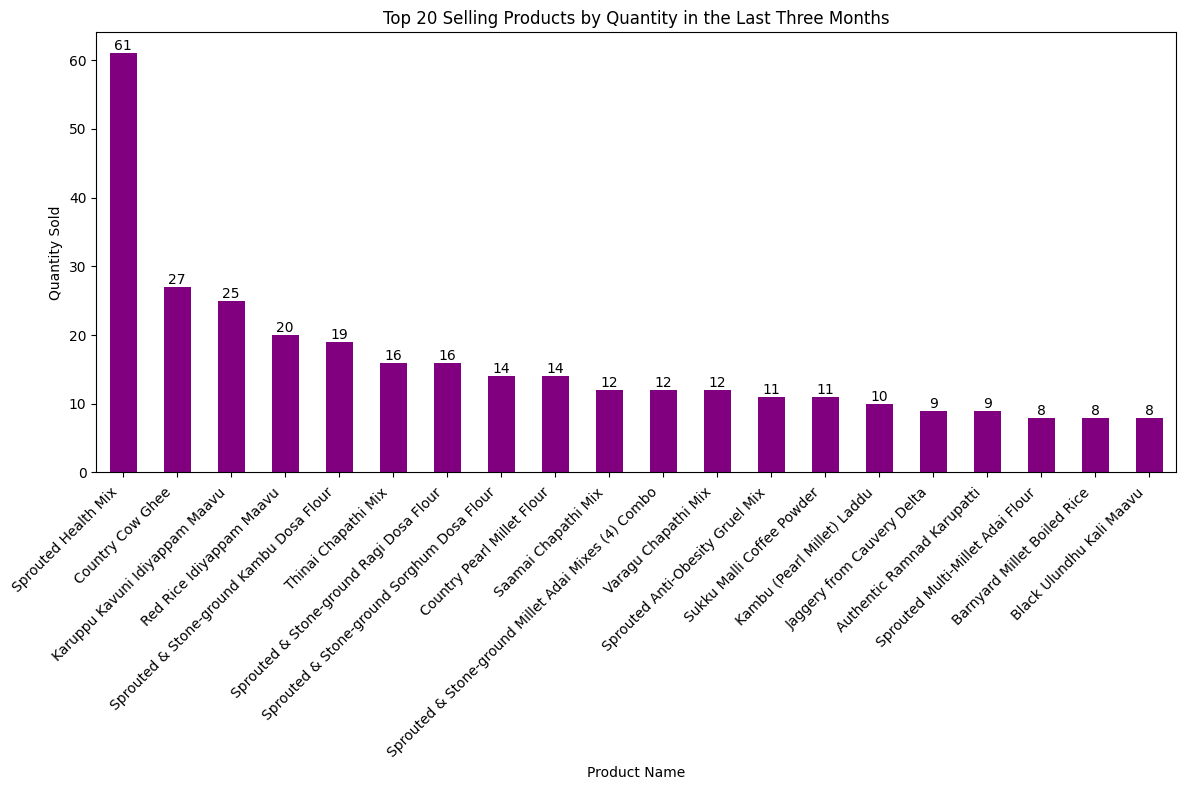

In [ ]:
top_20_products_by_quantity = top_products_by_quantity_three_months.head(20)

plt.figure(figsize=(12, 8))
top_20_products_by_quantity.plot(kind='bar', color='purple')
plt.title('Top 20 Selling Products by Quantity in the Last Three Months')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(top_20_products_by_quantity):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

b.By six months.





In [ ]:
top_products_by_quantity_six_months = df_last_six_months.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)

pd.set_option('display.max_rows', None)
print("Top Selling Products by Quantity in the Last Six Months:")
print(top_products_by_quantity_six_months)

Top Selling Products by Quantity in the Last Six Months:
Product Name
Sprouted Health Mix                                                    150
Sprouted & Stone-ground Kambu Dosa Flour                               119
Sprouted & Stone-ground Sorghum Dosa Flour                              91
Karuppu Kavuni Idiyappam Maavu                                          86
Sprouted & Stone-ground Ragi Dosa Flour                                 79
Country Cow Ghee                                                        66
Black Ulundhu Kali Maavu                                                61
Thinai Chapathi Mix                                                     58
Red Rice Idiyappam Maavu                                                57
Saamai Chapathi Mix                                                     56
Varagu Chapathi Mix                                                     55
Navadhaniya Mix                                                         51
Sprouted Multi-Millet Adai Flo

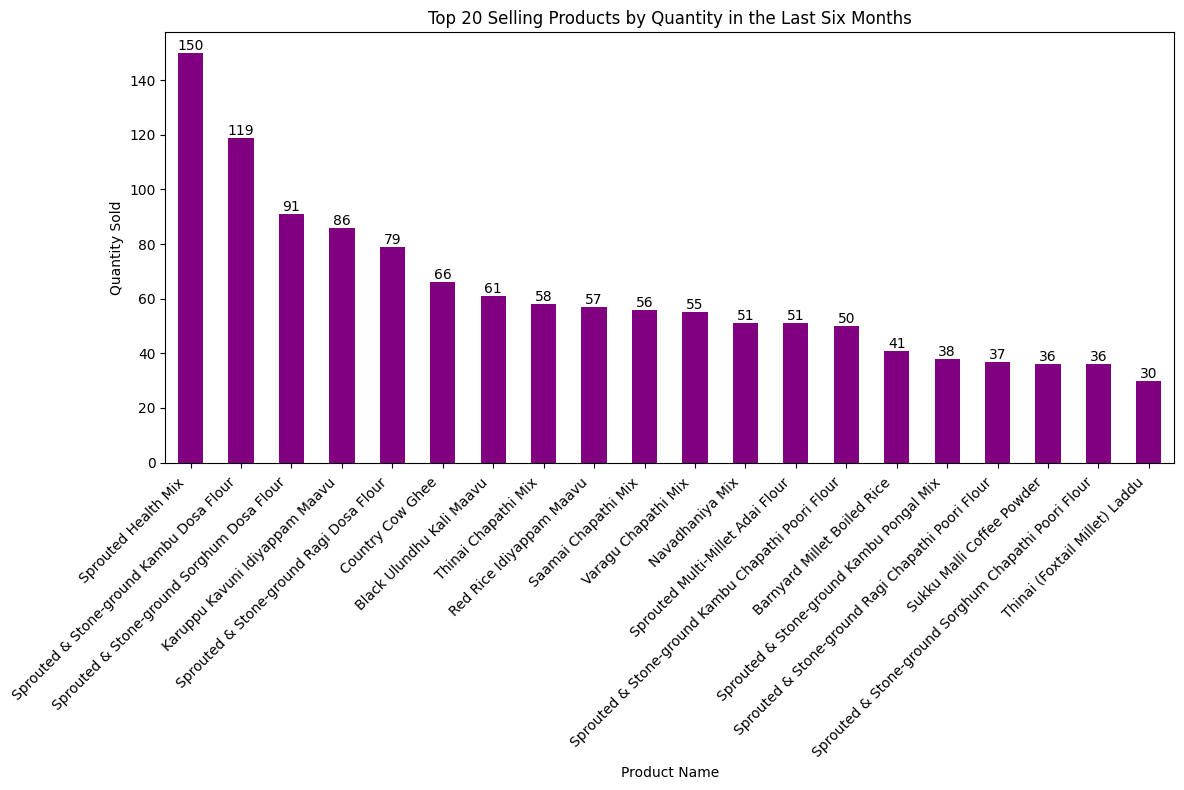

In [ ]:
top_20_products_by_quantity_six_months = top_products_by_quantity_six_months.head(20)

plt.figure(figsize=(12, 8))
top_20_products_by_quantity_six_months.plot(kind='bar', color='purple')
plt.title('Top 20 Selling Products by Quantity in the Last Six Months')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(top_20_products_by_quantity_six_months):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

c.By nine months.

In [ ]:
top_products_by_quantity_nine_months = df_last_nine_months.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)

pd.set_option('display.max_rows', None)
print("Top Selling Products by Quantity in the Last Nine Months:")
print(top_products_by_quantity_nine_months)

Top Selling Products by Quantity in the Last Nine Months:
Product Name
Sprouted Health Mix                                                                   218
Karuppu Kavuni Idiyappam Maavu                                                        173
Sprouted & Stone-ground Kambu Dosa Flour                                              145
Sprouted & Stone-ground Sorghum Dosa Flour                                            112
Red Rice Idiyappam Maavu                                                              111
Black Ulundhu Kali Maavu                                                              110
Country Cow Ghee                                                                      108
Sprouted & Stone-ground Ragi Dosa Flour                                                96
Saamai Chapathi Mix                                                                    86
Thinai Chapathi Mix                                                                    84
Navadhaniya Mix              

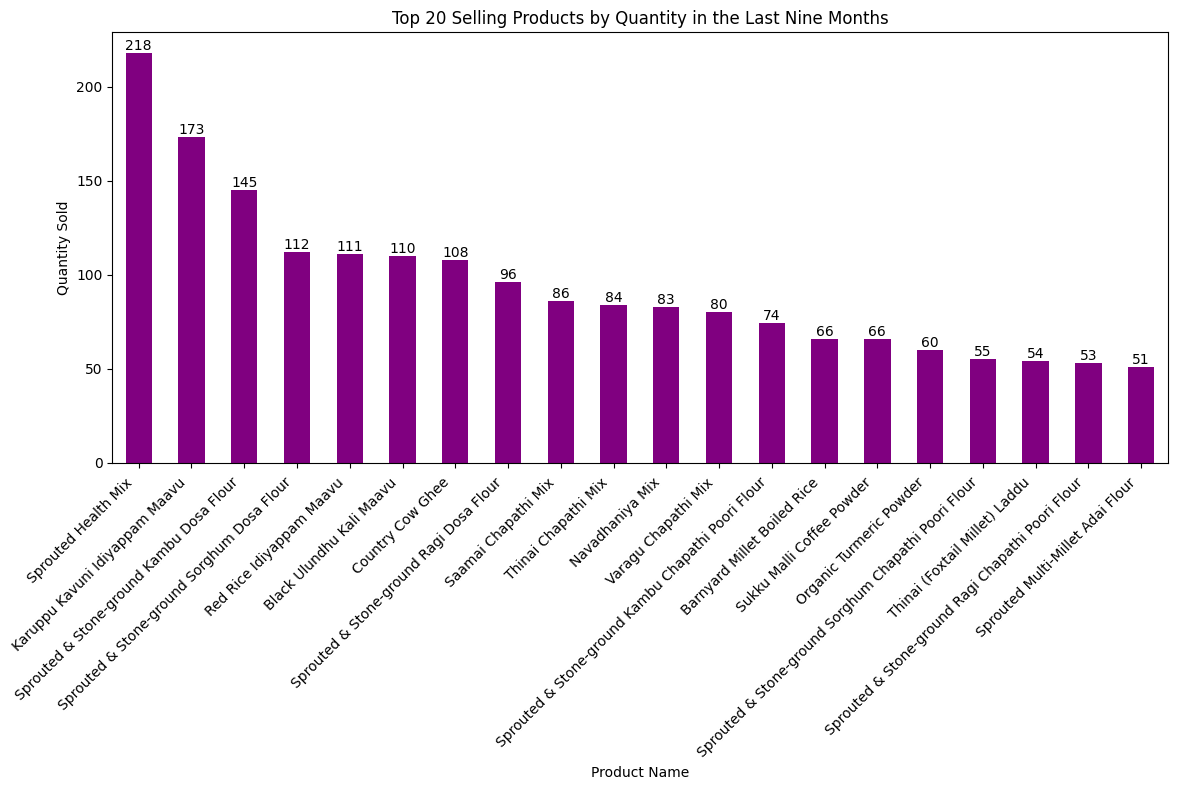

In [ ]:
top_20_products_by_quantity_nine_months = top_products_by_quantity_nine_months.head(20)

plt.figure(figsize=(12, 8))
top_20_products_by_quantity_nine_months.plot(kind='bar', color='purple')
plt.title('Top 20 Selling Products by Quantity in the Last Nine Months')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(top_20_products_by_quantity_nine_months):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

**2.Which are the top selling products in terms of amount(overall)?**

In [ ]:
df['Total Product Sale Price (incl. tax)'] = pd.to_numeric(df['Total Product Sale Price (incl. tax)'])
top_products_by_amount = df.groupby('Product Name')['Total Product Sale Price (incl. tax)'].sum().sort_values(ascending=False)
print("Top Selling Products by Amount:")
print(top_products_by_amount)


Top Selling Products by Amount:
Product Name
Country Cow Ghee                                                                      51049
Sprouted Health Mix                                                                   47350
Karuppu Kavuni Idiyappam Maavu                                                        27837
Sprouted & Stone-ground Kambu Dosa Flour                                              17919
Jaggery from Cauvery Delta                                                            15254
Combo Pack: Wood Cold Pressed Oils                                                    14435
Wood Cold Pressed Gingelly Oil                                                        14365
Authentic Ramnad Karupatti                                                            14074
Sprouted & Stone-ground Sorghum Dosa Flour                                            13536
Healthy Breakfast Choices Pack                                                        13200
Red Rice Idiyappam Maavu           

Top 10 selling products in terms of amount.


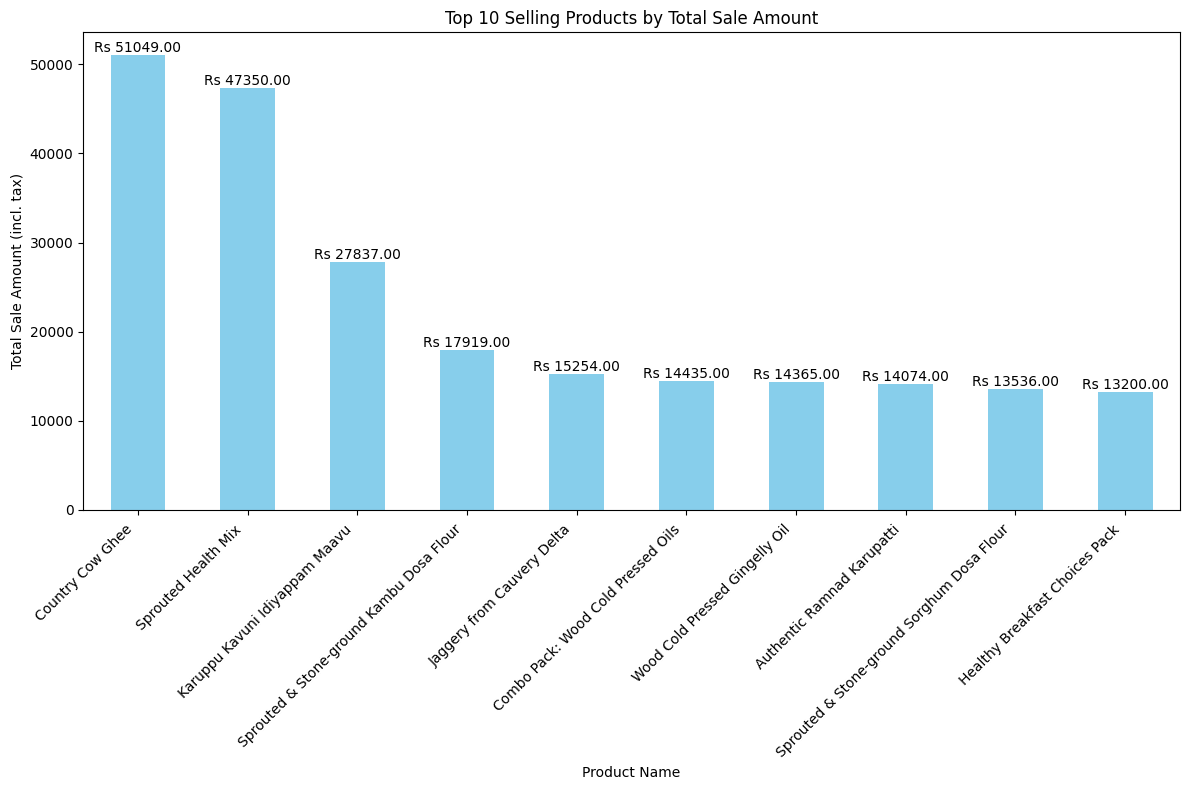

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


top_10_products_by_amount = top_products_by_amount.head(10)


plt.figure(figsize=(12, 8))
ax = top_10_products_by_amount.plot(kind='bar', color='skyblue')


plt.title('Top 10 Selling Products by Total Sale Amount')
plt.xlabel('Product Name')
plt.ylabel('Total Sale Amount (incl. tax)')


plt.xticks(rotation=45, ha='right')


for index, value in enumerate(top_10_products_by_amount):
    plt.text(index, value, f'Rs {value:.2f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()


a.By three months.

In [ ]:
top_products_by_amount_three_months = df_last_three_months.groupby('Product Name')['Total Product Sale Price (incl. tax)'].sum().sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print("Top Selling Products by Amount in the Last Three Months:")
print(top_products_by_amount_three_months)

Top Selling Products by Amount in the Last Three Months:
Product Name
Country Cow Ghee                                                       9939
Sprouted & Stone-ground Millet Adai Mixes (4) Combo                    7620
Sprouted Health Mix                                                    7098
Monthly Kitchen Combo: Wood Cold Pressed Groundnut & Gingelly Oils     4330
Wood Cold Pressed Gingelly & Coconut Oils                              3800
Karuppu Kavuni Idiyappam Maavu                                         3211
Wood Cold Pressed Groundnut Oil                                        3188
Wood Cold Pressed Gingelly Oil                                         3149
Sprouted Anti-Obesity Gruel Mix                                        3052
Wood Cold Pressed Groundnut & Gingelly Oils                            2430
Sprouted & Stone-ground Kambu Dosa Flour                               2307
Authentic Ramnad Karupatti                                             2148
Sprouted Kambu & R

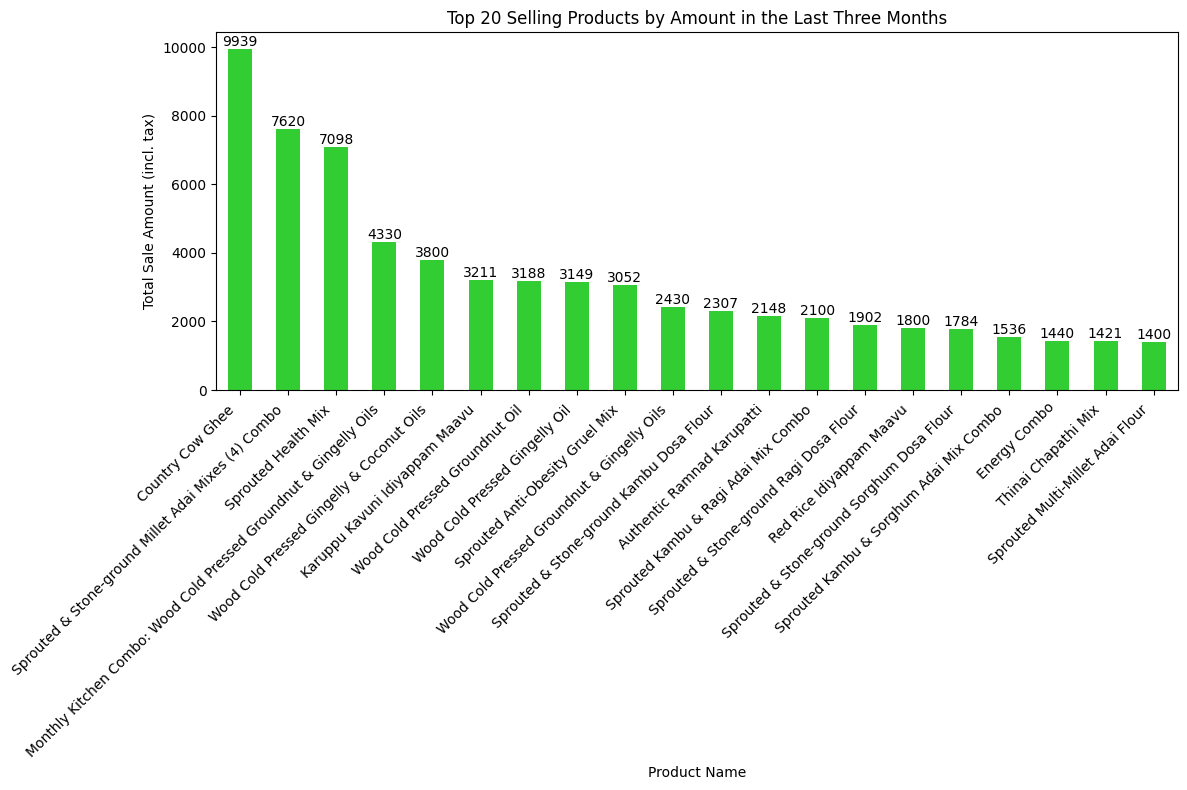

In [ ]:
plt.figure(figsize=(12, 8))
top_products_by_amount_three_months.head(20).plot(kind='bar', color='limegreen')
plt.title('Top 20 Selling Products by Amount in the Last Three Months')
plt.xlabel('Product Name')
plt.ylabel('Total Sale Amount (incl. tax)')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(top_products_by_amount_three_months.head(20)):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.tight_layout()


plt.show()

b.By six months.

In [ ]:
top_products_by_amount_six_months = df_last_six_months.groupby('Product Name')['Total Product Sale Price (incl. tax)'].sum().sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print("Top Selling Products by Amount in the Last Six Months:")
print(top_products_by_amount_six_months)

Top Selling Products by Amount in the Last Six Months:
Product Name
Country Cow Ghee                                                       25499
Sprouted Health Mix                                                    18143
Healthy Breakfast Choices Pack                                         13200
Sprouted & Stone-ground Kambu Dosa Flour                               12285
Monthly Kitchen Combo: Wood Cold Pressed Groundnut & Gingelly Oils     11995
Karuppu Kavuni Idiyappam Maavu                                         11141
Sprouted & Stone-ground Sorghum Dosa Flour                              9344
Healthy Dinner Choices Pack - 2                                         8642
Healthy Dinner Choices Pack - 1                                         8640
Wood Cold Pressed Groundnut & Gingelly Oils                             8100
Sprouted & Stone-ground Millet Adai Mixes (4) Combo                     7620
Wood Cold Pressed Gingelly & Coconut Oils                               7540
Sprouted

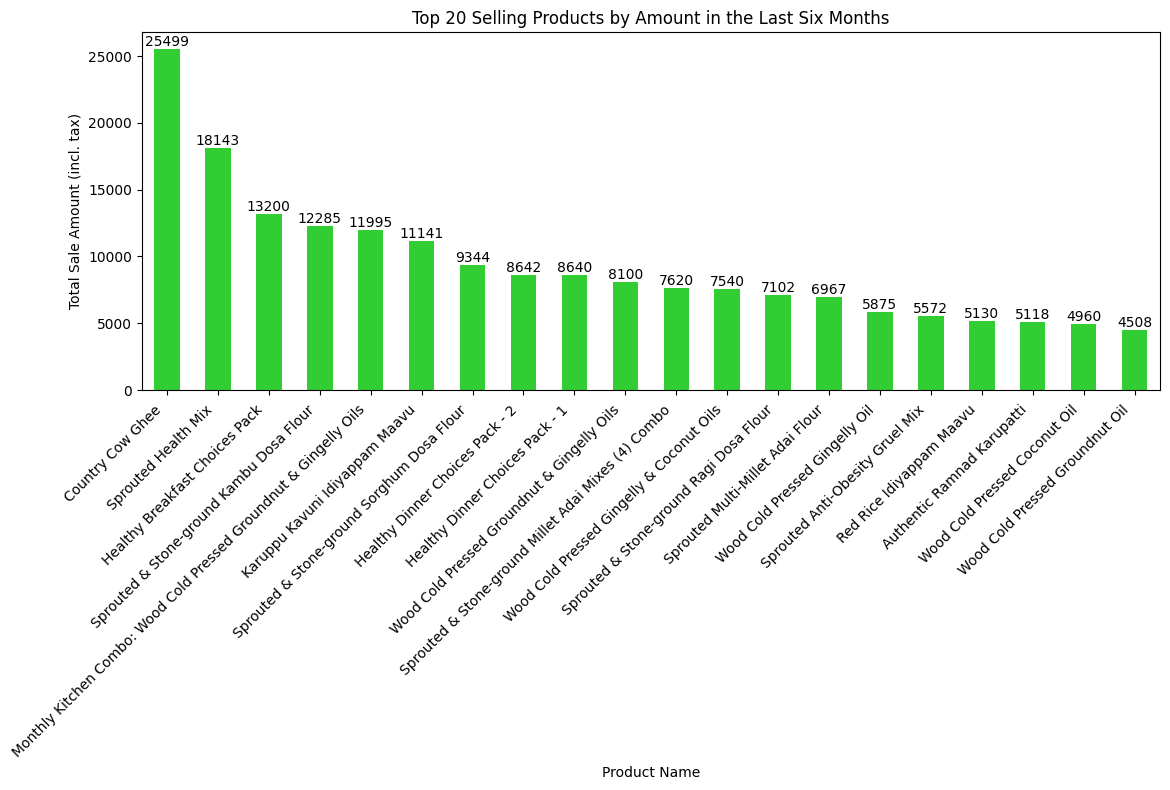

In [ ]:
plt.figure(figsize=(12, 8))
top_products_by_amount_six_months.head(20).plot(kind='bar', color='limegreen')
plt.title('Top 20 Selling Products by Amount in the Last Six Months')
plt.xlabel('Product Name')
plt.ylabel('Total Sale Amount (incl. tax)')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(top_products_by_amount_six_months.head(20)):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.tight_layout()
plt.show()

c.By nine months.

In [ ]:
top_products_by_amount_nine_months = df_last_nine_months.groupby('Product Name')['Total Product Sale Price (incl. tax)'].sum().sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print("Top Selling Products by Amount in the Last Nine Months:")
print(top_products_by_amount_nine_months)


Top Selling Products by Amount in the Last Nine Months:
Product Name
Country Cow Ghee                                                                      41449
Sprouted Health Mix                                                                   31439
Karuppu Kavuni Idiyappam Maavu                                                        22389
Sprouted & Stone-ground Kambu Dosa Flour                                              15535
Wood Cold Pressed Gingelly Oil                                                        13885
Healthy Breakfast Choices Pack                                                        13200
Combo Pack: Wood Cold Pressed Oils                                                    12385
Sprouted & Stone-ground Sorghum Dosa Flour                                            12137
Monthly Kitchen Combo: Wood Cold Pressed Groundnut & Gingelly Oils                    11995
Authentic Ramnad Karupatti                                                            10948
Red Rice Id

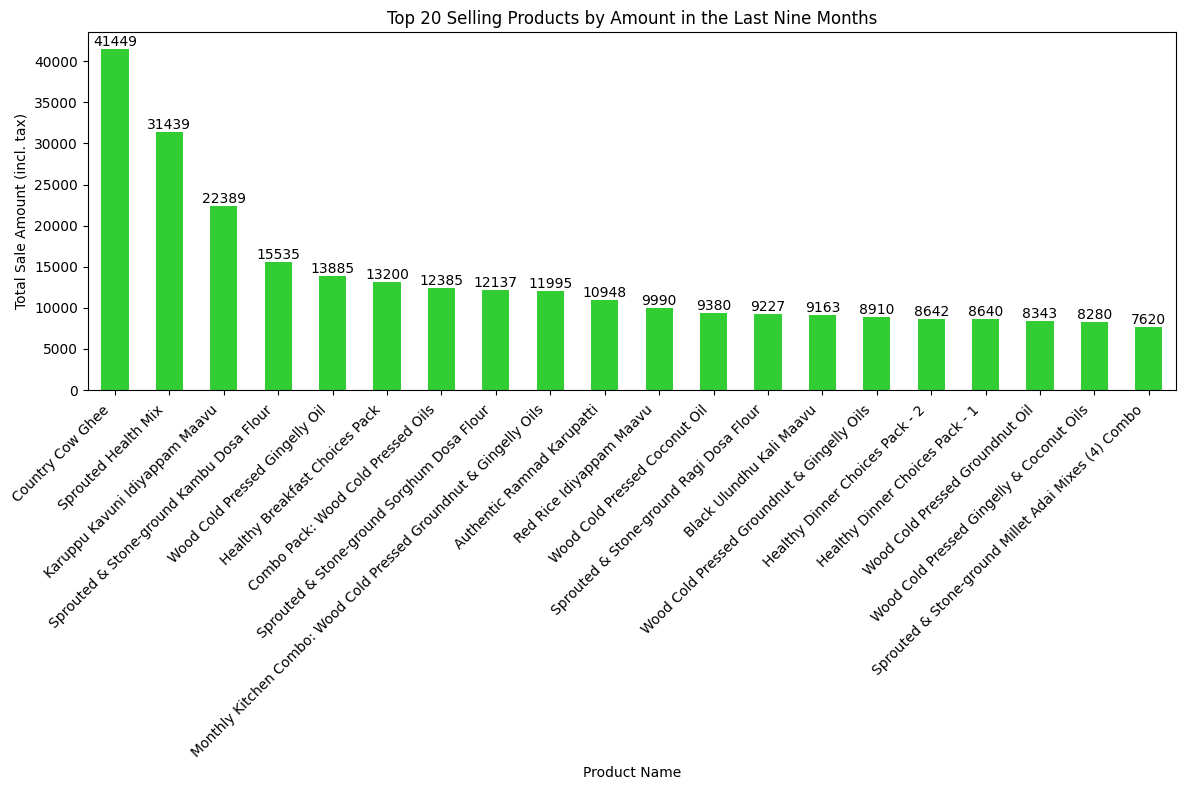

In [ ]:
plt.figure(figsize=(12, 8))
top_products_by_amount_nine_months.head(20).plot(kind='bar', color='limegreen')
plt.title('Top 20 Selling Products by Amount in the Last Nine Months')
plt.xlabel('Product Name')
plt.ylabel('Total Sale Amount (incl. tax)')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(top_products_by_amount_nine_months.head(20)):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Top 10 Selling Products by Total Sale Amount and Quantity(without numbering)



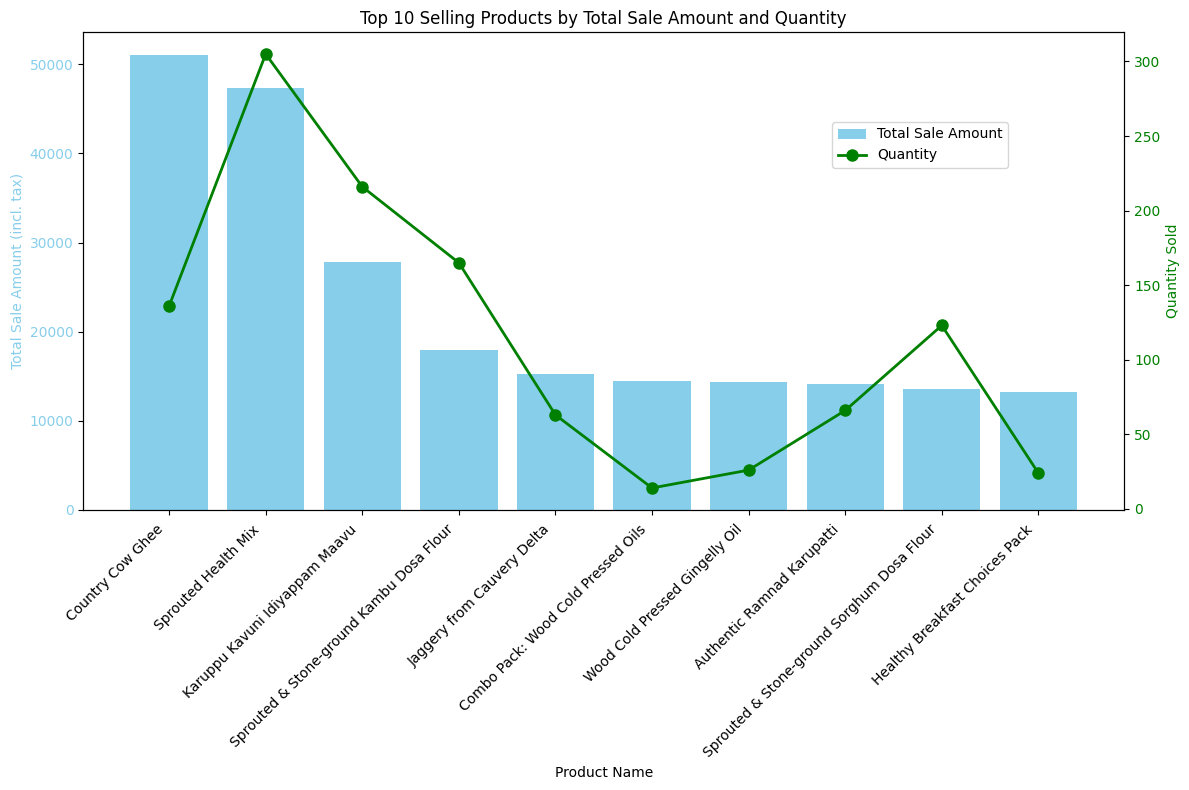

In [ ]:

top_10_products_by_amount = top_products_by_amount.head(10)

top_10_products = top_10_products_by_amount.index

top_10_products_by_quantity = top_products_by_quantity[top_10_products]

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.bar(top_10_products, top_10_products_by_amount, color='skyblue', label='Total Sale Amount')

ax1.set_title('Top 10 Selling Products by Total Sale Amount and Quantity')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Total Sale Amount (incl. tax)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(top_10_products, top_10_products_by_quantity, color='green', marker='o', linestyle='-', linewidth=2, markersize=8, label='Quantity')
ax2.set_ylabel('Quantity Sold', color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

plt.tight_layout()
plt.show()


Top 10 Selling Products by Total Sale Amount and Quantity(with numbering)


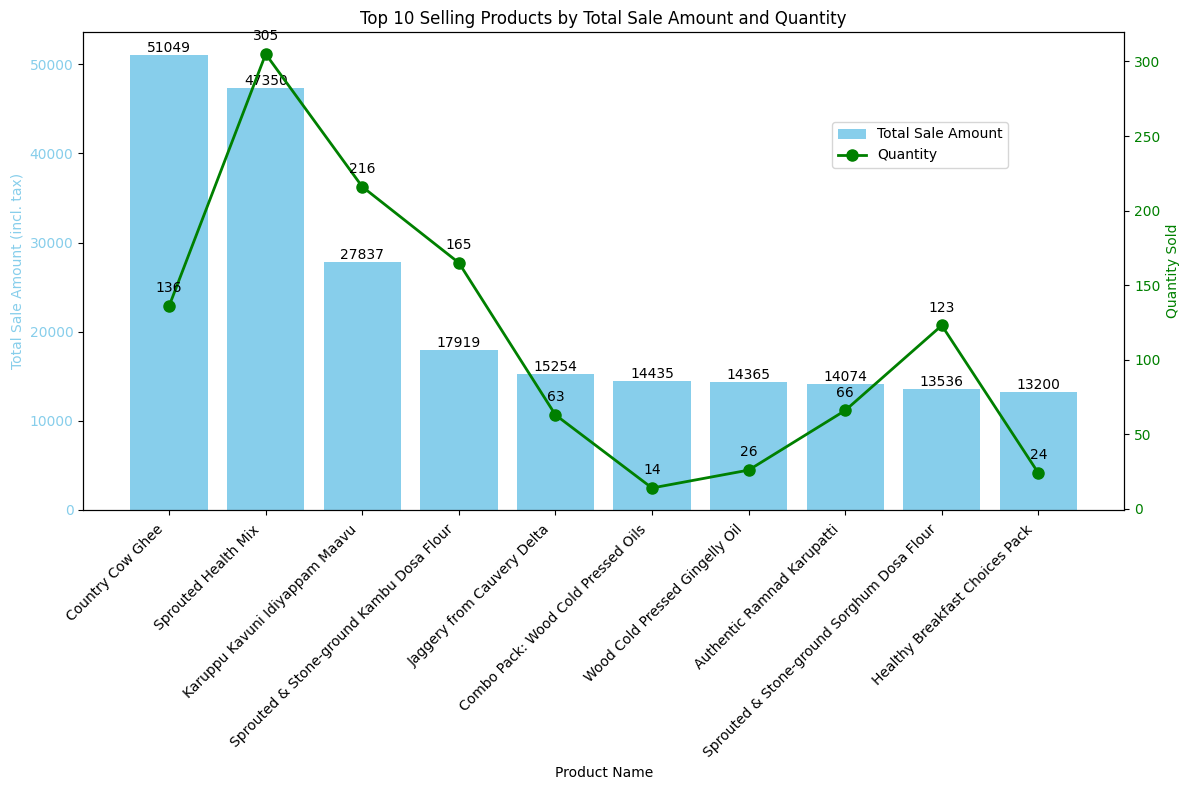

In [ ]:

top_10_products_by_amount = top_products_by_amount.head(10)

top_10_products = top_10_products_by_amount.index

top_10_products_by_quantity = top_products_by_quantity[top_10_products]

fig, ax1 = plt.subplots(figsize=(12, 8))

bars = ax1.bar(top_10_products, top_10_products_by_amount, color='skyblue', label='Total Sale Amount')

ax1.set_title('Top 10 Selling Products by Total Sale Amount and Quantity')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Total Sale Amount (incl. tax)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

plt.xticks(rotation=45, ha='right')

# Add number annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

ax2 = ax1.twinx()
line, = ax2.plot(top_10_products, top_10_products_by_quantity, color='green', marker='o', linestyle='-', linewidth=2, markersize=8, label='Quantity')
ax2.set_ylabel('Quantity Sold', color='green')
ax2.tick_params(axis='y', labelcolor='green')

for i, txt in enumerate(top_10_products_by_quantity):
    ax2.annotate(txt, (top_10_products[i], top_10_products_by_quantity[i]), textcoords="offset points", xytext=(0,10), ha='center', color='black')

fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

plt.tight_layout()
plt.show()


**3.Which products figure in orders above ₹800?**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df['Order Amount'] = pd.to_numeric(df['Order Amount'], errors='coerce')

orders_above_800 = df[df['Order Amount'] > 800]

product_counts = orders_above_800['Product Name'].value_counts()
pd.set_option('display.max_rows', None)
print("Products in Orders Above ₹800:")
print(product_counts)



Products in Orders Above ₹800:
Product Name
Sprouted & Stone-ground Kambu Dosa Flour                                              62
Country Cow Ghee                                                                      57
Sprouted Health Mix                                                                   55
Karuppu Kavuni Idiyappam Maavu                                                        54
Sprouted & Stone-ground Sorghum Dosa Flour                                            49
Black Ulundhu Kali Maavu                                                              39
Red Rice Idiyappam Maavu                                                              38
Sprouted & Stone-ground Ragi Dosa Flour                                               38
Saamai Chapathi Mix                                                                   32
Thinai Chapathi Mix                                                                   31
Barnyard Millet Boiled Rice                                       

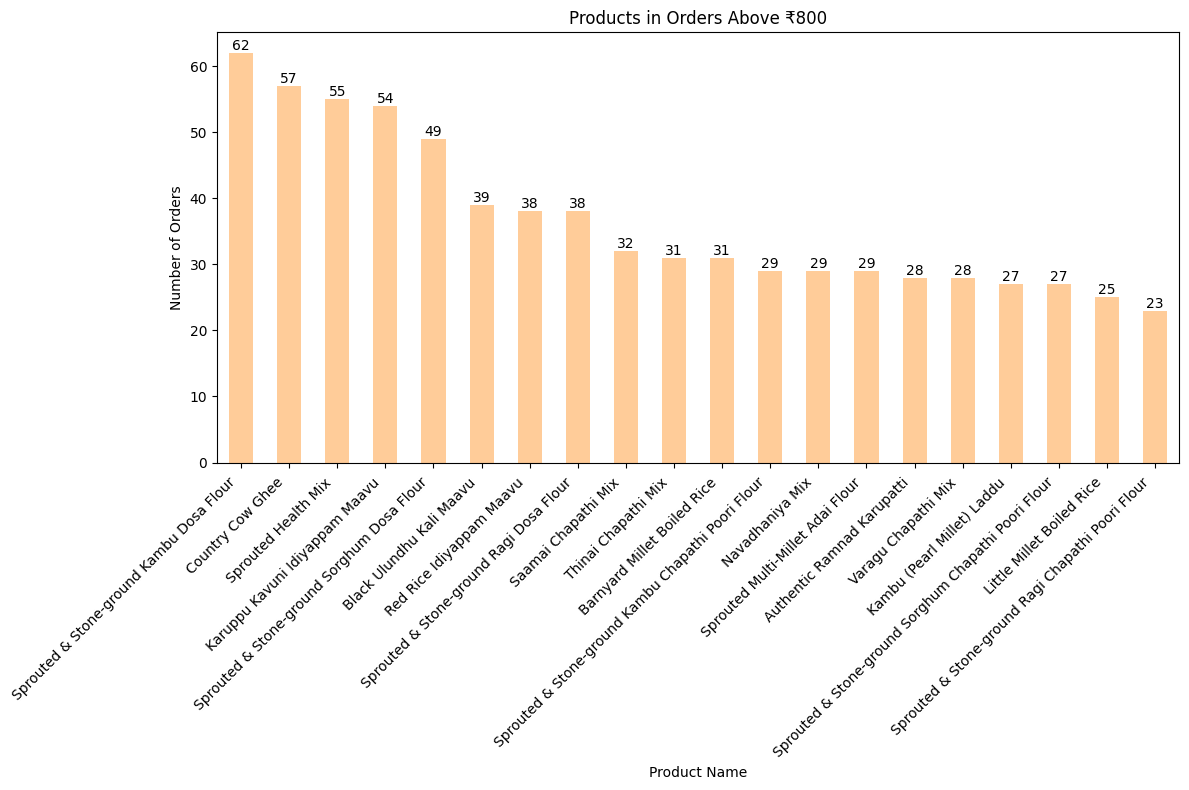

In [ ]:
plt.figure(figsize=(12, 8))
product_counts.head(20).plot(kind='bar', color='#FFCC99')
plt.title('Products in Orders Above ₹800')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(product_counts.head(20)):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

a.By three months.